In [ ]:
# clear any previous failed builds
!rm -rf ~/.cache/torch_extensions/*

# tell the build where CUDA lives on Colab
import os
os.environ["CUDA_HOME"] = "/usr/local/cuda"
os.environ["CUDA_PATH"] =  "/usr/local/cuda"

In [ ]:
!pip install numpy==1.25.2 \
            torch==2.0.0 torchvision==0.15.1 torchaudio==2.0.1 \
            git+https://github.com/etrommer/torch-approx.git

  Cloning https://github.com/etrommer/torch-approx.git to /tmp/pip-req-build-d7og320v
  Running command git clone --filter=blob:none --quiet https://github.com/etrommer/torch-approx.git /tmp/pip-req-build-d7og320v
  Resolved https://github.com/etrommer/torch-approx.git to commit 34417226bc1f2d2e0fb82cea905b8daa1527be46
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 91.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 112.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 110.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 93.7 MB/s eta

In [ ]:
!sudo apt install libomp-dev ninja-build


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libomp-14-dev libomp5-14
Suggested packages:
  libomp-14-doc
The following NEW packages will be installed:
  libomp-14-dev libomp-dev libomp5-14 ninja-build
0 upgraded, 4 newly installed, 0 to remove and 35 not upgraded.
Need to get 850 kB of archives.
After this operation, 9,349 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libomp5-14 amd64 1:14.0.0-1ubuntu1.1 [389 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 libomp-14-dev amd64 1:14.0.0-1ubuntu1.1 [347 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 ninja-build amd64 1.10.1-1 [111 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libomp-dev amd64 1:14.0-55~exp2 [3,074 B]
Fetched 850 kB in 2s (343 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usab

In [ ]:
# Base code as a string
base_code = """
def AND(A,B):
    A=int(A)
    B=int(B)
    return A&B
def nand(a, b):
    return 0 if (a == 1 and b == 1) else 1
def xnor(a,b):
    return 1 if a==b else 0
def nor(a, b):
    return 1 if (a == 0 and b == 0) else 0
def half_adder(A, B):
    A=int(A)
    B=int(B)
    sum_bit = A ^ B
    carry = A & B
    return [sum_bit, carry]

def full_adder(A,B,C):
    A=int(A)
    B=int(B)
    C=int(C)
    sum = A^B^C
    carry = (A&B) | (B&C) | (A&C)
    return [sum,carry]

# Basic compressors
def ahmad(A,B,C,D):
    A=int(A)
    B=int(B)
    C=int(C)
    D=int(D)
    sum = nand(nor(A,B),nor(C,D))
    carry = nor(nor(A,B),nor(C,D))
    return [sum,carry]

def akbari(A,B,C,D):
    A=int(A)
    B=int(B)
    C=int(C)
    D=int(D)
    sum = nand(xnor(A,B),xnor(C,D))
    carry = nand(nand(A,B),nand(C,D))
    return [sum,carry]

def meo(x1,x2,x3,x4):
    num_bi = [x4, x3, x2, x1]
    num_de = int(''.join(str(x) for x in num_bi), base=2)

    if num_de == 0:
        sum_a = 0
        carry_a = 0

    elif num_de == 1:
        sum_a = 1
        carry_a = 0

    elif num_de == 2:
        sum_a = 1
        carry_a = 0

    elif num_de ==3:
        sum_a = 0
        carry_a = 1

    elif num_de==4:
        sum_a = 1
        carry_a = 0

    elif num_de ==5:
        sum_a = 0
        carry_a = 1

    elif num_de ==6:
        sum_a = 0
        carry_a = 1

    elif num_de ==7:
        sum_a = 0
        carry_a = 1

    elif num_de ==8:
        sum_a = 1
        carry_a = 0

    elif num_de ==9:
        sum_a = 0
        carry_a = 1

    elif num_de ==10:
        sum_a = 0
        carry_a = 1

    elif num_de ==11:
        sum_a = 1
        carry_a = 1

    elif num_de ==12:
        sum_a = 0
        carry_a = 1

    elif num_de ==13:
        sum_a = 1
        carry_a = 1

    elif num_de ==14:
        sum_a = 1
        carry_a = 1

    else:
        sum_a = 1
        carry_a = 1


    return [sum_a,carry_a]


def venka(x1,x2,x3,x4):
    num_bi = [x4, x3, x2, x1]
    num_de = int(''.join(str(x) for x in num_bi), base=2)

    if num_de == 0:
        sum_a = 0
        carry_a = 0

    elif num_de == 1:
        sum_a = 1
        carry_a = 0

    elif num_de == 2:
        sum_a = 1
        carry_a = 0

    elif num_de ==3:
        sum_a = 0
        carry_a = 1

    elif num_de==4:
        sum_a = 1
        carry_a = 0

    elif num_de ==5:
        sum_a = 1
        carry_a = 0

    elif num_de ==6:
        sum_a = 1
        carry_a = 0

    elif num_de ==7:
        sum_a = 1
        carry_a = 1

    elif num_de ==8:
        sum_a = 1
        carry_a = 0

    elif num_de ==9:
        sum_a = 1
        carry_a = 0

    elif num_de ==10:
        sum_a = 1
        carry_a = 0

    elif num_de ==11:
        sum_a = 1
        carry_a = 1

    elif num_de ==12:
        sum_a = 0
        carry_a = 1

    elif num_de ==13:
        sum_a = 1
        carry_a = 1

    elif num_de ==14:
        sum_a = 1
        carry_a = 1
    else:
        sum_a = 1
        carry_a = 1


    return [sum_a,carry_a]

def yang(x1,x2,x3,x4):
    num_bi = [x4, x3, x2, x1]
    num_de = int(''.join(str(x) for x in num_bi), base=2)

    if num_de == 0:
        sum_a = 0
        carry_a = 0
    elif num_de == 1:
        sum_a = 1
        carry_a = 0
    elif num_de == 2:
        sum_a = 1
        carry_a = 0
    elif num_de ==3:
        sum_a = 0
        carry_a = 1
    elif num_de==4:
        sum_a = 1
        carry_a = 0
    elif num_de ==5:
        sum_a = 0
        carry_a = 1
    elif num_de ==6:
        sum_a = 0
        carry_a = 1
    elif num_de ==7:
        sum_a = 1
        carry_a = 1
    elif num_de ==8:
        sum_a = 1
        carry_a = 0
    elif num_de ==9:
        sum_a = 0
        carry_a = 1
    elif num_de ==10:
        sum_a = 0
        carry_a = 1
    elif num_de ==11:
        sum_a = 1
        carry_a = 1
    elif num_de ==12:
        sum_a = 1
        carry_a = 1
    elif num_de ==13:
        sum_a = 1
        carry_a = 1
    elif num_de ==14:
        sum_a = 1
        carry_a = 1
    else:
        sum_a = 1
        carry_a = 1

    return [sum_a,carry_a]

def momeni(x1,x2,x3,x4):
    num_bi = [x4, x3, x2, x1]
    num_de = int(''.join(str(x) for x in num_bi), base=2)

    if num_de == 0 :
        sum_a = 1
        carry_a = 0

    elif num_de == 1:
        sum_a = 1
        carry_a = 0

    elif num_de == 2:
        sum_a = 1
        carry_a = 0

    elif num_de ==3:
        sum_a = 1
        carry_a = 0

    elif num_de==4:
        sum_a = 1
        carry_a = 0

    elif num_de ==5:
        sum_a = 0
        carry_a = 1

    elif num_de ==6:
        sum_a = 0
        carry_a = 1

    elif num_de ==7:
        sum_a = 1
        carry_a = 1

    elif num_de ==8:
        sum_a = 1
        carry_a = 0

    elif num_de ==9:
        sum_a = 0
        carry_a = 1

    elif num_de ==10:
        sum_a = 0
        carry_a = 1

    elif num_de ==11:
        sum_a = 1
        carry_a = 1

    elif num_de ==12:
        sum_a = 1
        carry_a = 0

    elif num_de ==13:
        sum_a = 1
        carry_a = 1

    elif num_de ==14:
        sum_a = 1
        carry_a = 1

    else:
        sum_a = 1
        carry_a = 1


    return [sum_a,carry_a]
def mux(sel, data0, data1):
    if sel == 0:
        return data0
    elif sel == 1:
        return data1
    else:
        return None

def app_compressor(A,B,C,D):
  a = int(A)
  b = int(B)
  c = int(C)
  d = int(D)
  temp1 = a^b
  temp2 = nand(a,b)
  temp3 = c^d
  temp4 = nand(c,d)

  temp5 = nand(temp1,temp3)
  temp6 = 1^temp1
  temp7 = AND(temp2,temp4)

  #sum
  sum = mux(temp3,temp1,temp6)

  #carry
  carry = nand(temp7,temp5)

  return [sum,carry]

# AC6G compressors
def AC6G1(A,B,C,D):
    A=int(A)
    B=int(B)
    C=int(C)
    D=int(D)
    sum = ((A|B)|(C|D))
    carry = (A&(C|D)|(B&C))
    return [sum,carry]

def AC6G2(A,B,C,D):
    A=int(A)
    B=int(B)
    C=int(C)
    D=int(D)
    sum = ((A|B)|(C|D))
    carry = (A&(C|D)|(B&D))
    return [sum,carry]

def AC6G3(A,B,C,D):
    A=int(A)
    B=int(B)
    C=int(C)
    D=int(D)
    sum = ((A|C)|(B|D))
    carry = (A&(C|D)|(D&C))
    return [sum,carry]

def AC6G4(A,B,C,D):
    A=int(A)
    B=int(B)
    C=int(C)
    D=int(D)
    sum = ((A|C)|(B|D))
    carry = (B& (C|D)|(A&C))
    return [sum,carry]

def AC6G5(A,B,C,D):
    A=int(A)
    B=int(B)
    C=int(C)
    D=int(D)
    sum = ((A|D)|(B|C))
    carry = (B&(C|D)|(A&D))
    return [sum,carry]

def AC6G6(A,B,C,D):
    A=int(A)
    B=int(B)
    C=int(C)
    D=int(D)
    sum = ((A|D)|(B|C))
    carry = (B&(C|D)|(D&C))
    return [sum,carry]

def AC6G7(A,B,C,D):
    A=int(A)
    B=int(B)
    C=int(C)
    D=int(D)
    sum = ((A|B)|(C|D))
    carry = ((C&(A|B))|(A&B))
    return [sum,carry]

def AC6G8(A,B,C,D):
    A=int(A)
    B=int(B)
    C=int(C)
    D=int(D)
    sum = ((A|C)|(B|D))
    carry = ((D&(A|B))|(A&B))
    return [sum,carry]

def AC6G9(A,B,C,D):
    A=int(A)
    B=int(B)
    C=int(C)
    D=int(D)
    sum = ((A|D)|(B|C))
    carry = ((A&(B|D))|(B&C))
    return [sum,carry]

def AC6G10(A,B,C,D):
    A=int(A)
    B=int(B)
    C=int(C)
    D=int(D)
    sum = ((A|B)|(C|D))
    carry = ((A&(B|D))|(C&D))
    return [sum,carry]

def AC6G11(A,B,C,D):
    A=int(A)
    B=int(B)
    C=int(C)
    D=int(D)
    sum = ((A|C)|(B|D))
    carry = ((C&(B|D))|(A&B))
    return [sum,carry]

def AC6G12(A,B,C,D):
    A=int(A)
    B=int(B)
    C=int(C)
    D=int(D)
    sum = ((A|D)|(B|C))
    carry = ((C&(B|D))|(A&D))
    return [sum,carry]

# ACFGI compressors
def ACFGI1(A,B,C,D):
    A=int(A)
    B=int(B)
    C=int(C)
    D=int(D)
    sum = 1
    carry = A
    return [sum,carry]

def ACFGII1(A,B,C,D):
    A=int(A)
    B=int(B)
    C=int(C)
    D=int(D)
    sum = A
    carry = B
    return [sum,carry]

def ACFGII10(A,B,C,D):
    A=int(A)
    B=int(B)
    C=int(C)
    D=int(D)
    sum = D
    carry = A
    return [sum,carry]

###############################MULTIPLIER##################
def multiply2(A,B):
    A=bin(A)[2:]
    B=bin(B)[2:]
    A=A.zfill(8)
    B=B.zfill(8)
    L=[]
    N=len(A)
    M=len(B)

    for i in range(M):
        k = []
        for j in range(N):
            k.append(AND(A[j],B[M-1-i]))
        L.append(k)

    ##column 5
    (x20,y20) = COMPRESSORa(L[0][3],L[1][4],L[2][5],L[3][6])
    (x21,y21) = COMPRESSORb(L[4][7],x20,0,0)

    ##column 6
    (x0,y0)   = COMPRESSORc(L[0][2],L[1][3],L[2][4],L[3][5])
    (x19,y19) = COMPRESSORd(L[4][6],L[5][7],x0,y20)
    (m5,c5)   = half_adder(x19,y21)

    ##column 7
    (x1,y1) = COMPRESSORe(L[0][1],L[1][2],L[2][3],L[3][4])
    (x2,y2) = COMPRESSORf(L[4][5],L[5][6],L[6][7],0)
    (x3,y3) = COMPRESSORg(x1,x2,y0,0)
    (m6,c6) = full_adder(x3,y19,c5)

    ##column 8
    (x4,y4) = COMPRESSORh(L[0][0],L[1][1],L[2][2],L[3][3])
    (x5,y5) = COMPRESSORi(L[4][4],L[5][5],L[6][6],L[7][7])
    (x6,y6) = COMPRESSORj(x4,x5,y1,y2)
    (m7,c7) = full_adder(x6,y3,c6)

    ##column 9
    (x7,y7) = COMPRESSORk(L[1][0],L[2][1],L[3][2],L[4][3])
    (x8,y8) = COMPRESSORl(L[5][4],L[6][5],L[7][6],0)
    (x9,y9) = COMPRESSORm(x7,x8,y4,y5)
    (m8,c8) = full_adder(x9,y6,c7)

    ##column 10
    (x10,y10) = COMPRESSORn(L[2][0],L[3][1],L[4][2],L[5][3])
    (x11,y11) = COMPRESSORo(L[6][4],L[7][5],0,0)
    (x12,y12) = COMPRESSORp(x10,x11,y7,y8)
    (m9,c9)   = full_adder(x12,y9,c8)

    ##column 11
    (x13,y13) = COMPRESSORq(L[3][0],L[4][1],L[5][2],L[6][3])
    (x14,y14) = COMPRESSORr(L[7][4],x13,y10,y11)
    (m10,c10) = full_adder(x14,y12,c9)

    ##column 12
    (x15,y15) = COMPRESSORs(L[4][0],L[5][1],L[6][2],L[7][3])
    (x16,y16) = half_adder(x15,y13)
    (m11,c11) = full_adder(x16,y14,c10)

    ##column 13
    (x17,y17) = COMPRESSORt(L[5][0],L[6][1],L[7][2],y15)
    (m12,c12) = full_adder(x17,y16,c11)

    ##column 14
    (x18,y18) = half_adder(L[6][0],L[7][1])
    (m13,c13) = full_adder(x18,y17,c12)

    ##column 15
    (m14,c14) = full_adder(L[7][0],c13,y18)

    m15 = c14
    m0 = m1 = m2 = m3 = 0
    m4 = x21
    out=[m15,m14,m13,m12,m11,m10,m9,m8,m7,m6,m5,m4,m3,m2,m1,m0]
    result = ''.join(map(str, out))
    return(int(result,2))
"""

In [ ]:
from google.colab import files
files.upload()

In [ ]:
def train_and_evaluate():
    import torch
    import torch.nn as nn
    import torch.optim as optim
    import torchvision.transforms as transforms
    from torchvision.datasets import MNIST
    from torch.utils.data import DataLoader
    import torch.ao.quantization as quant
    import torchapprox.layers as tal
    from torchapprox.utils import wrap_quantizable, get_approx_modules
    import numpy as np
    import time
    import torch.nn.functional as F
    from torch.utils.data import DataLoader, Subset
    print("Checking for GPU availability...")
    # Check for GPU availability
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Define the custom CNN model
    print("Defining the custom CNN model...")
    class LeNet5(nn.Module):
        def __init__(self):
            super(LeNet5, self).__init__()
            self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=2)  # Output: 28x28
            self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)  # Output: 14x14
            self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)  # Output: 10x10
            self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)  # Output: 5x5
            self.fc1 = nn.Linear(16 * 5 * 5, 120)  # Fully connected layer
            self.fc2 = nn.Linear(120, 84)
            self.fc3 = nn.Linear(84, 10)  # 10 output classes (digits 0-9)

        def forward(self, x):
            x = F.relu(self.conv1(x))
            x = self.pool1(x)
            x = F.relu(self.conv2(x))
            x = self.pool2(x)
            x = x.view(-1, 16 * 5 * 5)  # Flatten for FC layers
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            x = self.fc3(x)  # No activation (CrossEntropyLoss includes softmax)
            return x
    # print("Initializing custom CNN model...")
    # Initialize the model
    model = LeNet5()
    model.to(device)
    # print("Model initialized successfully!")

    # print("Wrapping layers for quantization...")
    # Wrap layers for quantization
    wrap_quantizable(model)
    # print("Wrapping completed.")

    # print("Preparing the model for QAT...")
    # Prepare model for Quantization-Aware Training (QAT)
    quant.prepare_qat(model, tal.layer_mapping_dict(), inplace=True)
    # print("Model prepared for QAT.")

    # print("Preparing MNIST dataset...")
    # Set up the dataset and data loaders
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))  # Normalize to range [-1, 1]
    ])
    # train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
    test_dataset = MNIST(root='./data', train=False, download=True, transform=transform)
    # num_samples = 20000
    # indices = torch.randperm(len(train_dataset))[:num_samples]

    # Use Subset to create a smaller dataset
    # subset_train_dataset = Subset(train_dataset, indices)
    # train_loader = DataLoader(subset_train_dataset, batch_size=256 * 4, shuffle=True, pin_memory=True, num_workers=8)
    test_loader = DataLoader(test_dataset, batch_size=256 * 4 * 4, shuffle=False, pin_memory=True, num_workers=8)
    # print("Dataset and data loaders ready.")

    # print("Setting up the loss function and optimizer...")
    # Set up the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    # print("Loss function and optimizer set up.")

    # Generate the Lookup Table (LUT) for approximate multiplication
    from temp import multiply2  # Import the multiply2 function from temp.py

    def apply_bias(value):
        return value if value < 128 else value - 256

    lut_size = 256
    lut = np.zeros((lut_size, lut_size), dtype=np.int16)

    for i in range(lut_size):
        for j in range(lut_size):
            x_biased = apply_bias(i)
            y_biased = apply_bias(j)
            product = multiply2(abs(x_biased * 2), abs(y_biased * 2))
            if (i >= 128 and j < 128) or (i < 128 and j >= 128):
                product = -product
            lut[i][j] = product / 4

    # Function to set approximate forward pass
    def set_approx_forward(model, lut):
        for name, module in get_approx_modules(model):
            if hasattr(module, 'approx_fwd'):
                module.lut = lut
                module.inference_mode = tal.InferenceMode.APPROXIMATE
                # print(f"Set approx_fwd with LUT for module: {name}")
            else:
                continue
                # print(f"Module {name} does not support approx_fwd.")

    # Switch to approximate multiplication mode
    set_approx_forward(model, lut)


    # Fine-tune the model with approximate multiplication

    #load the model -
    model.load_state_dict(torch.load('lenet_mnist_final_CNN.pth'))

    # print("Validating the model...")
    # Validate the model
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    # print(f"Validation complete. Accuracy on test set: {accuracy:.2f}%")

    return accuracy


# accuracy = train_and_evaluate()
# print(f"Final accuracy: {accuracy:.2f}%")


In [ ]:
import string

# Define the compressor functions
compressor_variants = [
    "ahmad", "akbari", "meo", "venka", "yang", "momeni",
    "AC6G1", "AC6G2", "AC6G3", "AC6G4", "AC6G5", "AC6G6",
    "AC6G7", "AC6G8", "AC6G9", "AC6G10", "AC6G11", "AC6G12",
    "ACFGI1", "ACFGII1", "ACFGII10", "app_compressor"
]

index_to_letter = string.ascii_lowercase

def generate_code(vector):
    """
    Replaces the compressor calls in column 8 based on the input vector.

    Args:
        vector (list): A list of size 3 indicating which compressor to use for each position.
    Returns:
        str: Modified Python code.
    """
    if len(vector) != 20:
        raise ValueError("Input vector must be of size 3.")

    modified_code = base_code

    # Replace each COMPRESSOR placeholder with a variant from the combination
    for idx, compressor_idx in enumerate(vector):
        compressor_name = compressor_variants[compressor_idx]
        placeholder = f"COMPRESSOR{index_to_letter[idx]}"
        # print(f"Replacing {placeholder} with {compressor_name}")
        modified_code = modified_code.replace(placeholder, compressor_name)


    return modified_code


# vector = [0, 12, 2, 3, 4, 5, 6, 7, 8, 9, 20, 11, 12, 13, 14, 15, 16, 17, 18, 21]
# code = generate_code(vector)
# print(code)



In [ ]:
def MRED(x):
    print("MRED: ", x)
    gencode = generate_code(x)

    # Write the code to temp.py
    with open("temp.py", "w") as file:
        file.write(gencode)
    print("Code written to temp.py")

    # Dynamically load temp.py
    import importlib.util
    import sys, os

    if "temp" in sys.modules:
        del sys.modules["temp"]

    spec = importlib.util.spec_from_file_location("temp", os.path.abspath("temp.py"))
    temp = importlib.util.module_from_spec(spec)
    spec.loader.exec_module(temp)

    multiply2 = temp.multiply2

    # Run MRED
    bit_width = 8
    samples = [(a, b) for a in range(2**bit_width) for b in range(2**bit_width)]

    total_error = 0
    count = 0

    for a, b in samples:
        approx_result = multiply2(a, b)
        exact_result = a * b
        if exact_result != 0:
            total_error += abs(approx_result - exact_result) / exact_result
        count += 1

    MRED_sampled = total_error / count if count > 0 else 0
    print("MRED_sampled: ", MRED_sampled)

    return MRED_sampled

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving parameters.yaml to parameters.yaml


In [ ]:
import yaml

def compute_latencies(params, x):
    comp_counts = [2, 2, 3, 3, 3, 3, 2, 1, 1]
    latencies = {}
    x_index = 0

    for col, count in zip(range(5, 14), comp_counts):
        if count == 3:
            lat1 = params['compressors'][x[x_index]]['latency']
            x_index += 1
            lat2 = params['compressors'][x[x_index]]['latency']
            x_index += 1
            lat3 = params['compressors'][x[x_index]]['latency']
            x_index += 1
            latency = max(lat1, lat2) + lat3
        else:
            latency = 0
            for _ in range(count):
                latency += params['compressors'][x[x_index]]['latency']
                x_index += 1

        latencies[col] = latency
    return latencies

def optimizationParam(x):
    with open("parameters.yaml", "r") as file:
        params = yaml.safe_load(file)

    total_latency = compute_latencies(params, x)
    total_power = 0

    for index in x:
        if 0 <= index < len(params['compressors']):
            compressor = params['compressors'][index]
            total_power += compressor['power']
        else:
            raise ValueError(f"Index {index} is out of range.")

    return max(total_latency.values()), total_power


In [ ]:
def multi_objective_function(x):
    """
    This function calculates four objectives: MRED, Latency, Area, and Power.
    The calculation is arbitrary for demonstration purposes. Replace these with your actual equations.
    """
    print(x, type(x))
    # Replace these with actual formulas for MRED, Latency, Area, and Power
    # from mred import MRED
    # from accuracy import train_and_evaluate
    # from optimizationParams import optimizationParam
    error = MRED(x)  # Example: Sum of squares

    final_acc =  train_and_evaluate()/100
    # Calculate Latency, Area, and Power using the optimizationPram function
    Latency, Power = optimizationParam(x)
    print(error, Latency, Power, final_acc)
    return error, Latency, Power, final_acc

In [ ]:
!pip install pymoo --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 8.0 MB/s eta 0:00:00


Processing input: [19 15  4 10  8  1  3  4  7  3  6  8 17 20 20 18  1  9 15  4]
[19 15  4 10  8  1  3  4  7  3  6  8 17 20 20 18  1  9 15  4] <class 'numpy.ndarray'>
MRED:  [19 15  4 10  8  1  3  4  7  3  6  8 17 20 20 18  1  9 15  4]
Code written to temp.py
MRED_sampled:  0.32685900388643346
Checking for GPU availability...
Using device: cuda
Defining the custom CNN model...
0.32685900388643346 0.22612 4.371740000000002 0.7565999999999999
Processing input: [ 7  5 10 21 11 19  1  6 21 13  2 15 21  1  4 20 20 14 17 12]
[ 7  5 10 21 11 19  1  6 21 13  2 15 21  1  4 20 20 14 17 12] <class 'numpy.ndarray'>
MRED:  [ 7  5 10 21 11 19  1  6 21 13  2 15 21  1  4 20 20 14 17 12]
Code written to temp.py
MRED_sampled:  0.13270275685987146
Checking for GPU availability...
Using device: cuda
Defining the custom CNN model...
0.13270275685987146 0.19636 3.2491800000000004 0.868
Processing input: [ 3 21 13 15  6  2  2  9  3 16 14 19  4  4 11 15 12  5 19 17]
[ 3 21 13 15  6  2  2  9  3 16 14 19  4  4 1

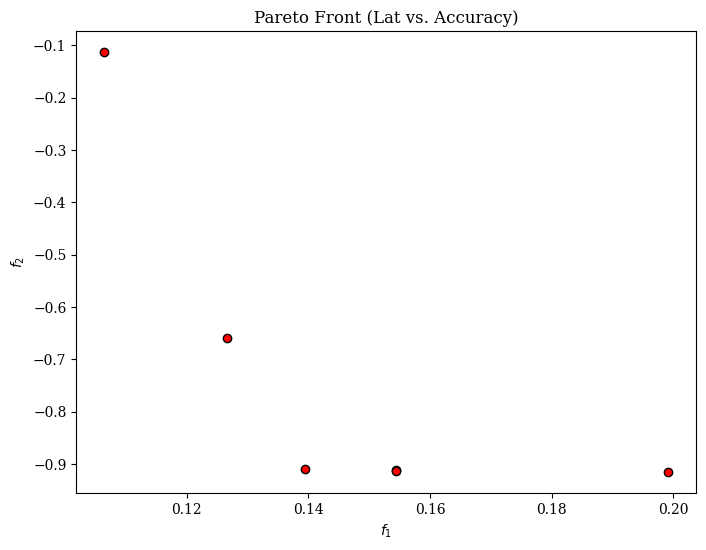

In [ ]:
import numpy as np
import csv
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import Problem
from pymoo.operators.sampling.lhs import LHS
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.sampling.lhs import LHS
from pymoo.operators.crossover.sbx import SimulatedBinaryCrossover
from pymoo.operators.mutation.pm import PM
from pymoo.operators.repair.rounding import RoundingRepair

# CSV file for logging inputs and outputs
log_file = "optimization_log_lat_acc.csv"

# Write the header to the log file
with open(log_file, "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Input_Config"] + ["MRED", "Latency", "Power", "Accuracy"])

# Define the multi-objective problem
class MultiObjectiveOptimization(Problem):
    def __init__(self):
        super().__init__(
            n_var=20,  # Number of decision variables
            n_obj=2,   # Number of objectives (Power, Accuracy)
            # n_constr=0,  # No constraints
            xl=np.zeros(20),  # Lower bounds for decision variables
            xu=np.full(20, 21)  # Upper bounds for decision variables
        )

    def _evaluate(self, x, out, *args, **kwargs):
        results = []
        rows_to_log = []
        for xi in x:
            # Ensure xi is an integer (in case rounding wasn't applied elsewhere)
            xi = np.round(xi).astype(int)
            print(f"Processing input: {xi}")  # Debugging
            error, latency, power, accuracy = multi_objective_function(xi)
            rows_to_log.append([xi.tolist(), error, latency, power, accuracy])
            results.append([latency, -accuracy])  # Accuracy negated for minimization
        with open(log_file, "a", newline="") as f:
            writer = csv.writer(f)
            writer.writerows(rows_to_log)
        out["F"] = np.array(results)

# Define the NSGA-II algorithm
algorithm = NSGA2(
    pop_size=50,  # Larger population size for large search space
    sampling=LHS(),  # Latin Hypercube Sampling for better diversity
    crossover=SimulatedBinaryCrossover(prob=0.9, eta=15),  # SBX with crossover probability
    mutation=PM(prob=0.2, eta=3.0, vtype=float, repair=RoundingRepair()),  # Polynomial mutation
)

# Instantiate the problem
problem = MultiObjectiveOptimization()

# Run the optimization
res = minimize(
    problem,
    algorithm,
    termination=("n_gen", 2),  # Increase generations for better convergence
    seed=42,
    save_history=True,
    verbose=True,
)

# Visualize the Pareto front
plot = Scatter(title="Pareto Front (Lat vs. Accuracy)")
plot.add(res.F, facecolor="red", edgecolor="k")
plot.save("pareto_front_lat_acc.png")

# Extract Pareto-optimal solutions
pareto_solutions = res.X
pareto_objectives = res.F

print("Pareto-optimal solutions:")
for i, (solution, objectives) in enumerate(zip(pareto_solutions, pareto_objectives)):
    print(f"Solution {i + 1}: {solution}")
    print(f"Power: {objectives[0]}, Accuracy: {-objectives[1]}")  # Accuracy is negated back
